# Twitter Machine-Learning Model

# 1. Importing the required libraries and functions

In [242]:
#importing the function to avoid unnecessary alerts
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
#importing all the required libraries for all functions
import numpy as num
import pandas as pan
import sys
import sklearn
import matplotlib.pyplot as pt
import seaborn as sb
import string as s

# 2. Acquiring the Twitter dataset

In [243]:
#loading our Twitter Spam information set
t = pan.read_csv('Twitterdata.csv', encoding='ISO-8859-1')

In [244]:
t.tail()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon Ã£ve,Spam
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality
11967,4937,Trump should be declared the victor by about 9...,2028.0,1674.0,2729.0,1.0,United States,Spam


In [245]:
#dropping some columns for more clarity and performance
t.drop(['Id','following','followers','actions','is_retweet'], axis=1, inplace=True)

In [246]:
t.columns = ['Tweet','Location','Class']

In [247]:
#showing some information about the data
print("\n---------------------The tail part of the data------------------------------------\n")
t.tail()


---------------------The tail part of the data------------------------------------



,Tweet,Location,Class
11963,11:11 meet harry,NaN,Quality
11964,If BBC Food disappears the loss of knowledge w...,"London, N4",Quality
11965,Look What Liberals Did to This Historic Monume...,honeymoon Ã£ve,Spam
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Mega Manila,Quality
11967,Trump should be declared the victor by about 9...,United States,Spam


In [248]:
#See how the class has been divided
ClassDis=t['Class']
size=len(t.index)

print("\n-----------------------------------Showing the Class Division setup -----------------------\n")
print("Total Twitter Dataset Values: {}".format(size))
print(ClassDis.value_counts())
print(ClassDis.value_counts() / size * 100.0)


-----------------------------------Showing the Class Division setup -----------------------

Total Twitter Dataset Values: 11968
Quality    6153
Spam       5815
Name: Class, dtype: int64
Quality    51.412099
Spam       48.587901
Name: Class, dtype: float64


# 3. Exploring and analysing the data

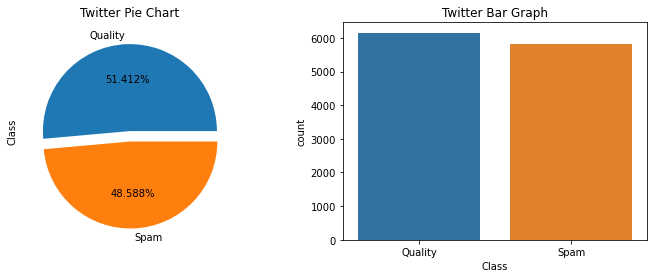

In [249]:
#Class division visualized by bar graph and pie chart
b, XY_Ax=pt.subplots(1,2, figsize=(12,4))
ClassDis.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=XY_Ax[0]).set_title("Twitter Pie Chart")
sb.countplot('Class',data=t).set_title("Twitter Bar Graph")
pt.show()

In [250]:
# checking out the data given
t.groupby('Class').describe()

Tweet                                                                 \
        count unique                                                top freq   
Class                                                                          
Quality  6153   5983  [HAPPY BIRTHDAY TAEYANG]\noriginally posted by...   10   
Spam     5815   5804     SE Wis. road construction projects  #Wisconsin    3   

        Location                              
           count unique            top  freq  
Class                                         
Quality     4505   2890             UK    41  
Spam        5812   1924  United States  2559

In [251]:
#Adding a new column to get the length of a Youtube comment
t['Tweet_Length'] = t['Tweet'].apply(len)
t.tail()

,Tweet,Location,Class,Tweet_Length
11963,11:11 meet harry,NaN,Quality,16
11964,If BBC Food disappears the loss of knowledge w...,"London, N4",Quality,123
11965,Look What Liberals Did to This Historic Monume...,honeymoon Ã£ve,Spam,108
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Mega Manila,Quality,168
11967,Trump should be declared the victor by about 9...,United States,Spam,94


In [252]:
#Youtube comment length described
t.Tweet_Length.describe()

count    11968.000000
mean        97.408005
std         43.112591
min          4.000000
25%         67.000000
50%         97.000000
75%        130.000000
max        500.000000
Name: Tweet_Length, dtype: float64

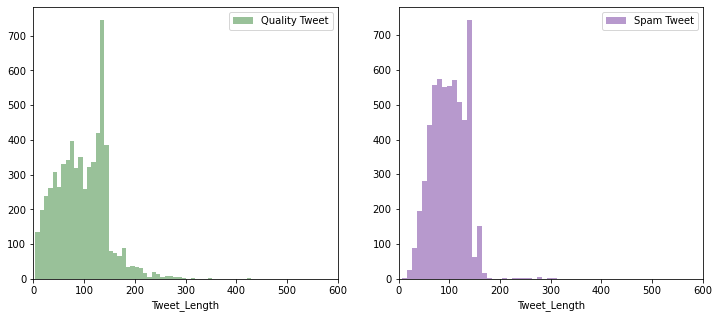

In [253]:
#Tweet length of Spam and Quality visulaized by bar graph
b, XY_Ax = pt.subplots(1, 2, figsize=(12, 5), sharex=True)
pt.xlim(0,600)
sb.distplot(t.Tweet_Length[t.Class=='Quality'], color='darkgreen', label='Quality Tweet', kde=False, ax=XY_Ax[0]);
sb.distplot(t.Tweet_Length[t.Class=='Spam'], color='indigo', label='Spam Tweet', kde=False, ax=XY_Ax[1]);
XY_Ax[0].legend();
XY_Ax[1].legend();

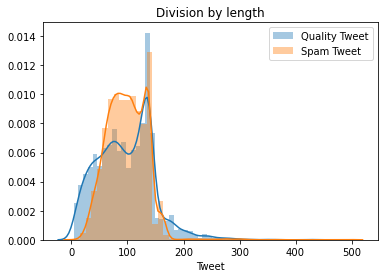

In [254]:
#Spam and non-spam Tweets divided by length visulaized by graph
Normaltweet =t[t['Class'] == 'Quality']['Tweet'].str.len()
sb.distplot(Normaltweet, label='Quality Tweet')
Spamtweet = t[t['Class'] == 'Spam']['Tweet'].str.len()
sb.distplot(Spamtweet, label='Spam Tweet')
pt.title('Division by length')
pt.legend()
pt.savefig('Length Division.png')

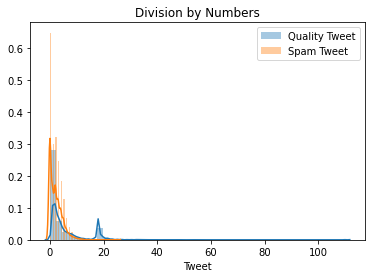

In [255]:
#Spam and non-spam tweets divided by numbers visulaized by graph
Normaltweet1 = t[t['Class'] == 'Quality']['Tweet'].str.replace(r'\D+', '').str.len()
sb.distplot(Normaltweet1, label='Quality Tweet')
Spamtweet1 = t[t['Class'] == 'Spam']['Tweet'].str.replace(r'\D+', '').str.len()
sb.distplot(Spamtweet1, label='Spam Tweet')
pt.title('Division by Numbers')
pt.legend()
pt.savefig('text division by nos.png')

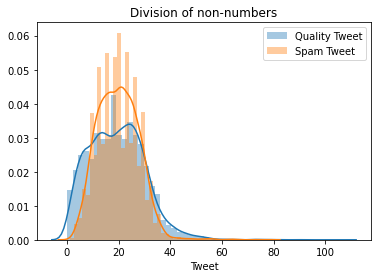

In [256]:
#Spam and non-spam tweets divided by non-numbers visulaized by graph
Normaltweet2 = t[t['Class'] == 'Quality']['Tweet'].str.replace(r'\w+', '').str.len()
sb.distplot(Normaltweet2, label='Quality Tweet')
Spamtweet2 = t[t['Class'] == 'Spam']['Tweet'].str.replace(r'\w+', '').str.len()
sb.distplot(Spamtweet2, label='Spam Tweet')
pt.title('Division of non-numbers')
pt.legend()
pt.savefig('text division by non-numbers.png')

# 4. Data Cleaning

In [257]:
#Converting class labels to binary values such as ham=0,Spam=1
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()
g = encode.fit_transform(t['Class'])
t["Label"]=g
t.tail()

,Tweet,Location,Class,Tweet_Length,Label
11963,11:11 meet harry,NaN,Quality,16,0
11964,If BBC Food disappears the loss of knowledge w...,"London, N4",Quality,123,0
11965,Look What Liberals Did to This Historic Monume...,honeymoon Ã£ve,Spam,108,1
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Mega Manila,Quality,168,0
11967,Trump should be declared the victor by about 9...,United States,Spam,94,1


In [258]:
#New column "Refined Tweet" created to see changes
t["Refined Tweet"] = t["Tweet"].copy()
t.tail()

,Tweet,Location,Class,Tweet_Length,Label,Refined Tweet
11963,11:11 meet harry,NaN,Quality,16,0,11:11 meet harry
11964,If BBC Food disappears the loss of knowledge w...,"London, N4",Quality,123,0,If BBC Food disappears the loss of knowledge w...
11965,Look What Liberals Did to This Historic Monume...,honeymoon Ã£ve,Spam,108,1,Look What Liberals Did to This Historic Monume...
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Mega Manila,Quality,168,0,"I uploaded a new track, ""Everyday Lite 1"", on ..."
11967,Trump should be declared the victor by about 9...,United States,Spam,94,1,Trump should be declared the victor by about 9...


In [259]:
# Getting rid of all unwanted words,tabs..etc and a space is placed in all number places
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'\d+(\.\d+)?', '')
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'[^\w\d\s]', ' ')
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'\s+', ' ')
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'^\s+|\s+?$', '')

# Substituting URL addresses with 'add'
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'add')

# Substituting currency symbols with 'currency'
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'£|\$', 'currency')

# Changing all capital words to small word
t["Refined Tweet"] = t["Refined Tweet"].str.lower()

# Getting rid of 1 term words
t["Refined Tweet"] = t["Refined Tweet"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
t.tail()

,Tweet,Location,Class,Tweet_Length,Label,Refined Tweet
11963,11:11 meet harry,NaN,Quality,16,0,meet harry
11964,If BBC Food disappears the loss of knowledge w...,"London, N4",Quality,123,0,if bbc food disappears the loss of knowledge w...
11965,Look What Liberals Did to This Historic Monume...,honeymoon Ã£ve,Spam,108,1,look what liberals did to this historic monume...
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Mega Manila,Quality,168,0,uploaded new track everyday lite on spreaker ...
11967,Trump should be declared the victor by about 9...,United States,Spam,94,1,trump should be declared the victor by about t...


In [260]:
# Removing punctuation marks like . , ! , ? , : ..etc
s.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# 5. Data Preprocessing

In [261]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer as ss
from nltk.corpus import stopwords
#gives a specific set of words 
Sw= (stopwords.words('english')) 
Sw[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [262]:
#Removing terms using the stemming process
processStem = ss("english")
def txtproc(twt):   
    twt = twt.translate(str.maketrans('','', s.punctuation))
    ws = [processStem.stem(word) for word in twt.split() if word.lower() not in stopwords.words("english")]
    return " ".join(ws)
t["Refined Tweet"] = t["Refined Tweet"].apply(txtproc)

In [263]:
#showing the old Tweets and new Tweets transformed
print("Unprocessed 6th Tweet:", t['Tweet'][6])
print("\nRefined Tweet :", t["Refined Tweet"][6], '\n''\n')

print("Unprocessed 10th Tweet:", t['Tweet'][10])
print("\nRefined Tweet :", t["Refined Tweet"][10], '\n''\n')

print("Unprocessed 220th Tweet:", t['Tweet'][220])
print("\nRefined Tweet :", t["Refined Tweet"][220], '\n''\n')

print("Unprocessed 45th Tweet:", t['Tweet'][45])
print("\nRefined Tweet :", t["Refined Tweet"][45], '\n''\n')

print("Unprocessed 558th Tweet:", t['Tweet'][558])
print("\nRefined Tweet :", t["Refined Tweet"][558], '\n''\n')

Unprocessed 6th Tweet: Big day.  #WeTheNorth #yyz #thesix #sunset #skyline @ The Six https://www.instagram.com/p/BFgrA9gBZay/

Refined Tweet : big day wethenorth yyz thesix sunset skylin six https www instagram com bfgragbzay 


Unprocessed 10th Tweet: Tagged by @CFOAlbaAsturias @AlbaSweetCFpic.twitter.com/sTfpjwrFSC

Refined Tweet : tag cfoalbaasturia albasweetcfp twitter com stfpjwrfsc 


Unprocessed 220th Tweet: Portage County Bank parent to buy Bancroft State Bank  #business

Refined Tweet : portag counti bank parent buy bancroft state bank busi 


Unprocessed 45th Tweet: Remy was killing shit long before "Lean Back'. It ain't our fault y'all bitches are like 19 and don't know what's up.

Refined Tweet : remi kill shit long lean back fault bitch like know 


Unprocessed 558th Tweet: #top RT DEPLOREABLENYC: WHO IS TO BLAME FOR THE CURRENT NORTH KOREAN NUCLEAR WEAPONS CRISIS?  PLEASE RT LIKE FOLLOW VOTE REPLY  #LETSGETO

Refined Tweet : top rt deploreablenyc blame current north korea

In [264]:
#token are created with Tweets refined
from nltk import word_tokenize,sent_tokenize
t['Toklist'] = t['Refined Tweet'].map(lambda w: nltk.tokenize.word_tokenize(w))

In [265]:
# new column "Refined Tweet_length" is created to show the changes
t['Refined Tweet_length'] = t['Refined Tweet'].apply(len)
t.tail()

,Tweet,Location,Class,Tweet_Length,Label,Refined Tweet,Toklist,Refined Tweet_length
11963,11:11 meet harry,NaN,Quality,16,0,meet harri,"[meet, harri]",10
11964,If BBC Food disappears the loss of knowledge w...,"London, N4",Quality,123,0,bbc food disappear loss knowledg catastroph ht...,"[bbc, food, disappear, loss, knowledg, catastr...",85
11965,Look What Liberals Did to This Historic Monume...,honeymoon Ã£ve,Spam,108,1,look liber histor monument arizona https co nq...,"[look, liber, histor, monument, arizona, https...",72
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Mega Manila,Quality,168,0,upload new track everyday lite spreaker litero...,"[upload, new, track, everyday, lite, spreaker,...",127
11967,Trump should be declared the victor by about 9...,United States,Spam,94,1,trump declar victor tonight base exit poll data,"[trump, declar, victor, tonight, base, exit, p...",47


In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


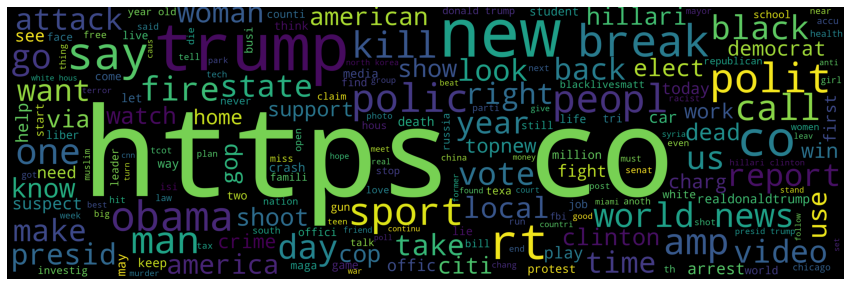

In [266]:
#Using Wordcloud to visualise Spam tweets
from wordcloud import WordCloud as wc
spamtweet= ' '.join(list(t[t['Class'] == "Spam"]["Refined Tweet"]))
spamset = wc(height = 1300, width=4000).generate(spamtweet)
pt.figure(figsize=(15,15))
pt.imshow(spamset)
pt.axis('off')
pt.show()

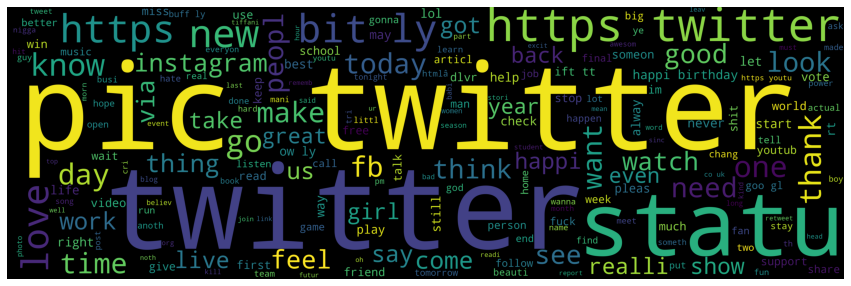

In [267]:
#Using Wordcloud to visualise Quality tweets
from wordcloud import WordCloud as wc
NonSpamtweet = ' '.join(list(t[t['Class'] == "Quality"]["Refined Tweet"]))
NonSpamset = wc(height = 1300, width=4000).generate(NonSpamtweet)
pt.figure(figsize=(15,15))
pt.imshow(NonSpamset)
pt.axis('off')
pt.show()

In [268]:
#getting most used 20 terms in spam and non-spam Tweets
from collections import Counter
NonSpamset = Counter(" ".join(t[t['Class']=='Quality']["Refined Tweet"]).split()).most_common(20)
NonSpamsetdata = pan.DataFrame.from_dict(NonSpamset)
NonSpamsetdata= NonSpamsetdata.rename(columns={0: "Non-spam text", 1 : "count"})

spamset = Counter(" ".join(t[t['Class']=='Spam']["Refined Tweet"]).split()).most_common(20)
Spamsetdata = pan.DataFrame.from_dict(spamset)
Spamsetdata = Spamsetdata.rename(columns={0: "Spam text", 1 : "count_"})

In [269]:
print(NonSpamsetdata[0:20])
print('\n\n',Spamsetdata[0:20])

   Non-spam text  count
0            com   3006
1        twitter   2390
2           http   1459
3            pic   1000
4          https    772
5         status    580
6            www    421
7             ly    391
8           like    272
9            bit    262
10          love    239
11           get    235
12           new    222
13            go    186
14           day    185
15         thank    181
16          know    178
17         happi    170
18           one    168
19          time    151


    Spam text  count_
0         co    5348
1      https    5090
2      trump     599
3       news     515
4         rt     301
5       http     243
6      polic     204
7        say     195
8        new     189
9      break     185
10       get     181
11       man     173
12     obama     172
13     polit     161
14     world     154
15     peopl     149
16      kill     144
17     black     142
18     sport     140
19      year     135


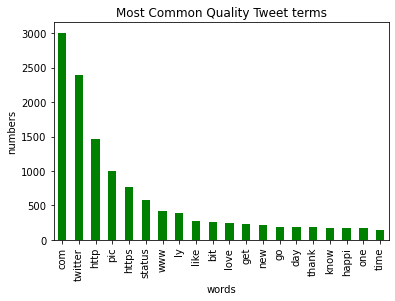

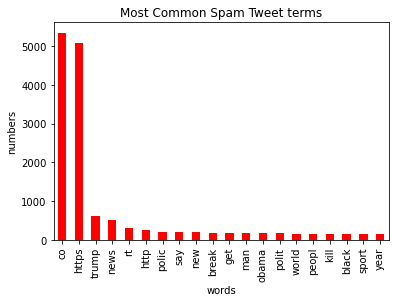

In [270]:
NonSpamsetdata.plot.bar(legend = False, color = 'green')
Yaxis = num.arange(len(NonSpamsetdata["Non-spam text"]))
pt.xticks(Yaxis, NonSpamsetdata["Non-spam text"])
pt.title('Most Common Quality Tweet terms')
pt.xlabel('words')
pt.ylabel('numbers')
pt.show()

Spamsetdata.plot.bar(legend = False, color = 'red')
Yaxis = num.arange(len(Spamsetdata["Spam text"]))
pt.xticks(Yaxis,Spamsetdata["Spam text"])
pt.title('Most Common Spam Tweet terms')
pt.xlabel('words')
pt.ylabel('numbers')
pt.show()

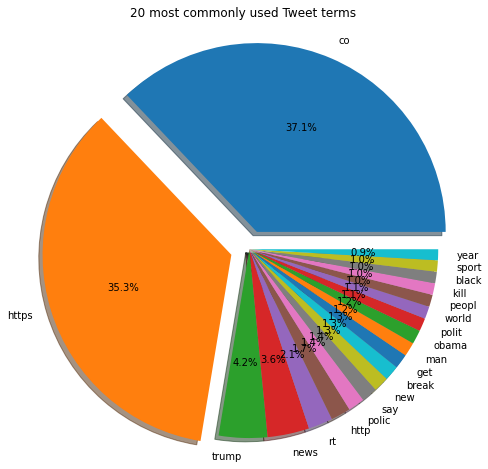

In [271]:
#showing the percentage of each word used
explode = (0.1, 0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 
f, Axis = pt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
pt.pie(Spamsetdata['count_'],
       labels = Spamsetdata["Spam text"], 
       shadow = True,
       autopct='%1.1f%%', 
       explode = explode)
pt.title("20 most commonly used Tweet terms")
pt.axis('equal')
pt.show()

In [272]:
pip install mlxtend

In [273]:
# A copy of the dataset is created 
Wholedataset = t.copy()
# getting rid of unwanted columns
Wholedataset.drop(["Refined Tweet", "Tweet_Length", "Toklist", "Refined Tweet_length", "Class","Location"], axis = 1, inplace = True)  
print(Wholedataset.count())

Tweet    11968
Label    11968
dtype: int64


# 6.Splitting the dataset into training and testing data 

In [274]:
from sklearn import feature_extraction, model_selection, naive_bayes, svm
from sklearn import metrics as m
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CT
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report as ClassRep
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

TrainA, TestA, TrainB, TestB = train_test_split(Wholedataset['Tweet'],
                                                    Wholedataset['Label'],
                                                    test_size=0.3,
                                                    random_state=101)

## 6a. Balancing the Dataset

In [275]:
# Joining TrainA and TrainB column to create a whole dataset consisting of Content and label columns
TrainANewset=pan.concat([TrainA, TrainB], axis=1)

NonSpam=TrainANewset[TrainANewset['Label']==0] 

Spam=TrainANewset[TrainANewset['Label']==1] 

#Upgrading the dataset
SpamUpgrade = resample(Spam,replace=True,n_samples=4300,random_state=101)

# joining upgraded spam Tweets with non-spam Tweets for a unified distribution
Upgraded = pan.concat([NonSpam, SpamUpgrade])

TrainA=Upgraded['Tweet']
TrainB=Upgraded['Label']

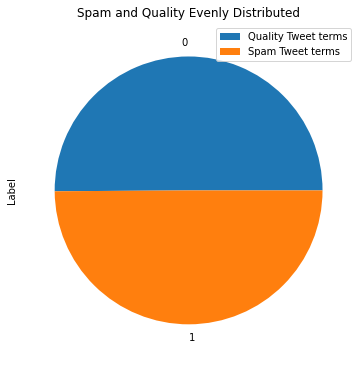

In [276]:
#Visualizing the new balanced dataset

Upgraded["Label"].value_counts().plot(kind = 'pie', 
                                          figsize = (6, 7))
                                          

pt.title('Spam and Quality Evenly Distributed')
pt.legend(["Quality Tweet terms", "Spam Tweet terms"])
pt.show()

## 6b.Vectorization process using TF-IDF Vectorizer

In [277]:
# Train data is transformed using TFIDF 
Tfvecto = TfidfVectorizer(stop_words = 'english', use_idf = True, lowercase = True, strip_accents='ascii')
TrainA_Tfvecto = Tfvecto.fit_transform(TrainA) 
TestA_Tfvecto = Tfvecto.transform(TestA) 
print(TrainA_Tfvecto.shape)

(8618, 23281)


In [278]:
print(TrainA_Tfvecto.shape)
print(TestA_Tfvecto.shape)

(8618, 23281)
(3591, 23281)


In [279]:
h = TrainA_Tfvecto.toarray()
print(TrainA.iloc[4],'\n')
print(TrainA.iloc[150],'\n')
print(TrainA.iloc[1003],'\n')

#GenerousMSG has adopted orphans, leprosy patients, prostitutes, transgenders etc. as his own children 
Thank you Dr. @Gurmeetramrahim Ji 

what? 

cant wait until payday 



In [280]:
# Tfidf transformation
h = TrainA_Tfvecto.toarray()
print(Tfvecto.inverse_transform(h[4]),'\n')
print(Tfvecto.inverse_transform(h[150]),'\n')
print(Tfvecto.inverse_transform(h[1990]),'\n')

[array(['adopted', 'children', 'dr', 'generousmsg', 'gurmeetramrahim',
       'ji', 'leprosy', 'orphans', 'patients', 'prostitutes', 'thank',
       'transgenders'], dtype='<U207')] 

[array([], dtype='<U207')] 

[array(['1030', '1321496a', 'battery', 'beefy', 'boasts', 'com',
       'computing', 'display', 'edge', 'elitebook', 'hp', 'http',
       'laptops', 'mobile', 'news', 'techradar', 'www'], dtype='<U207')] 



# 7. Comparison of Various ML Classifiers

## 7.1 Naive Bayes

In [281]:
# Model training and prediction
NBModel = MultinomialNB()
NBModel.fit(TrainA_Tfvecto, TrainB)

MultinomialNB()

In [282]:
NBPred = NBModel.predict(TestA_Tfvecto)
accuracy1=m.accuracy_score(TestB, NBPred)*100
print(accuracy1)

90.75466443887497


In [283]:
print(ClassRep(TestB, NBPred))

pan.DataFrame(
   CT(TestB, NBPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1835
           1       0.93      0.87      0.90      1756

    accuracy                           0.91      3591
   macro avg       0.91      0.91      0.91      3591
weighted avg       0.91      0.91      0.91      3591



PredictedData      
                          Ham  Spam
ActualData Ham           1723   112
           Spam           220  1536

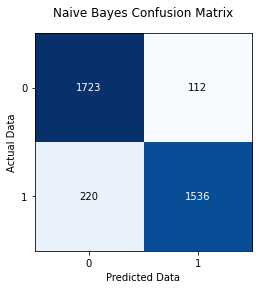

In [284]:
NB_Conmat = CT(TestB, NBPred)

f1, Axis1 = plot_confusion_matrix(conf_mat=NB_Conmat ,figsize=(8, 4))
pt.title("Naive Bayes Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

Naive Bayes Area Under Curve is : 0.9068399198078367


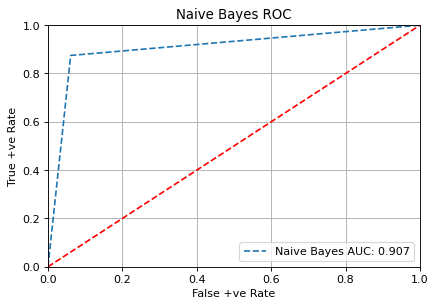

In [285]:

fpr1, tpr1, thresholds1 = m.roc_curve(TestB, NBPred, pos_label=1)
NB_Curve = m.auc(fpr1, tpr1)
fig1=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("Naive Bayes Area Under Curve is : {0}".format(NB_Curve))

pt.title('Naive Bayes ROC')
pt.plot(fpr1, tpr1,linestyle='--', label='Naive Bayes AUC: %0.3f' %NB_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('NB ROC')
pt.grid()
pt.show()

## 7.2 Logistic Regression

In [286]:
# Training and predicting spam messages using Logit Regression
LRModel = LogisticRegression()
LRModel.fit(TrainA_Tfvecto, TrainB)

LogisticRegression()

In [287]:
LRPred = LRModel.predict(TestA_Tfvecto)
accuracy2=m.accuracy_score(TestB, LRPred)*100
print(accuracy2)

92.09133945976052


In [288]:
print(ClassRep(TestB, LRPred))

pan.DataFrame(
   CT(TestB, LRPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1835
           1       0.96      0.87      0.92      1756

    accuracy                           0.92      3591
   macro avg       0.92      0.92      0.92      3591
weighted avg       0.92      0.92      0.92      3591



PredictedData      
                          Ham  Spam
ActualData Ham           1772    63
           Spam           221  1535

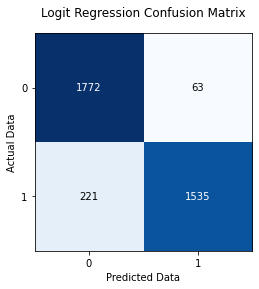

In [289]:
LR_ConMat = CT(TestB, LRPred)
f2,Axis2 = plot_confusion_matrix(conf_mat=LR_ConMat ,  figsize=(8, 4))
pt.title("Logit Regression Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

Logistic Regression Area Under Curve is : 0.9199066804044367


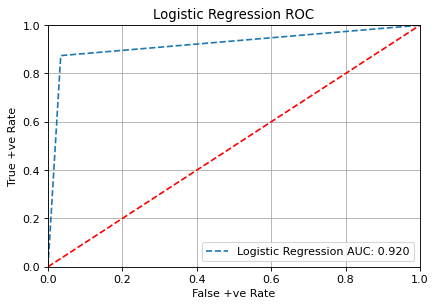

In [290]:
fpr2, tpr2, thresholds2 = m.roc_curve(TestB, LRPred, pos_label=1)
LR_Curve = m.auc(fpr2, tpr2)
fig2=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("Logistic Regression Area Under Curve is : {0}".format(LR_Curve))

pt.title('Logistic Regression ROC')
pt.plot(fpr2, tpr2,linestyle='--', label='Logistic Regression AUC: %0.3f' %LR_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('LR ROC')
pt.grid()
pt.show()

## 7.3 Stochastic Gradient Descent Classifier

In [291]:
SGDModel = SGDClassifier(max_iter = 100)
SGDModel.fit(TrainA_Tfvecto, TrainB)

SGDClassifier(max_iter=100)

In [292]:
SGDPred = SGDModel.predict(TestA_Tfvecto)
accuracy3=m.accuracy_score(TestB, SGDPred)*100
print(accuracy3)

92.87106655527708


In [293]:
print(ClassRep(TestB, SGDPred))

pan.DataFrame(
   CT(TestB, SGDPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1835
           1       0.97      0.88      0.92      1756

    accuracy                           0.93      3591
   macro avg       0.93      0.93      0.93      3591
weighted avg       0.93      0.93      0.93      3591



PredictedData      
                          Ham  Spam
ActualData Ham           1782    53
           Spam           203  1553

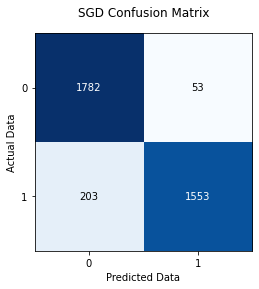

In [294]:
SGD_ConMat = CT(TestB, SGDPred)
f3, Axis3 = plot_confusion_matrix(conf_mat=SGD_ConMat ,  figsize=(8, 4))
pt.title("SGD Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

SGD Classifier Area Under Curve is : 0.9277567607828046


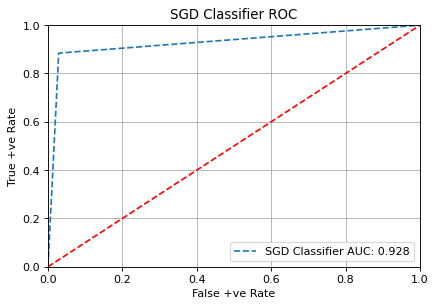

In [295]:
fpr3, tpr3, thresholds3 = m.roc_curve(TestB, SGDPred, pos_label=1)
SGD_Curve = m.auc(fpr3, tpr3)
fig3=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("SGD Classifier Area Under Curve is : {0}".format(SGD_Curve))

pt.title('SGD Classifier ROC')
pt.plot(fpr3, tpr3,linestyle='--', label='SGD Classifier AUC: %0.3f' %SGD_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('SGD ROC')
pt.grid()
pt.show()

## 7.4 KNN Neighbors

In [296]:
KNNModel = KNeighborsClassifier()
KNNModel.fit(TrainA_Tfvecto, TrainB)

KNeighborsClassifier()

In [297]:
KNNPred = KNNModel.predict(TestA_Tfvecto)
accuracy4=m.accuracy_score(TestB, KNNPred)*100
print(accuracy4)

51.48983570036202


In [298]:
print(ClassRep(TestB, KNNPred))

pan.DataFrame(
   CT(TestB, KNNPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1835
           1       0.94      0.01      0.02      1756

    accuracy                           0.51      3591
   macro avg       0.73      0.50      0.35      3591
weighted avg       0.72      0.51      0.35      3591



PredictedData     
                          Ham Spam
ActualData Ham           1834    1
           Spam          1741   15

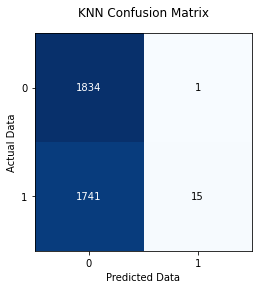

In [299]:
KNN_ConMat = CT(TestB, KNNPred)
f4, Axis4 = plot_confusion_matrix(conf_mat=KNN_ConMat ,  figsize=(8, 4))
pt.title("KNN Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

KNN Classifier Area Under Curve is : 0.5039985910510014


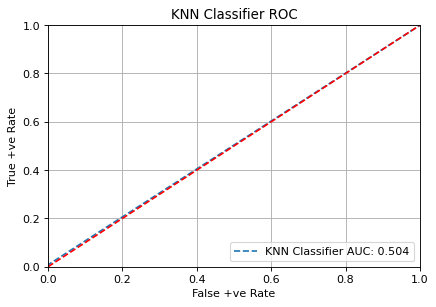

In [300]:
fpr4, tpr4, thresholds4 = m.roc_curve(TestB, KNNPred, pos_label=1)
KNN_Curve = m.auc(fpr4, tpr4)
fig4=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("KNN Classifier Area Under Curve is : {0}".format(KNN_Curve))

pt.title('KNN Classifier ROC')
pt.plot(fpr4, tpr4,linestyle='--', label='KNN Classifier AUC: %0.3f' %KNN_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('KNN ROC')
pt.grid()
pt.show()

## 7.5 Random Decision Forest

In [301]:
RDFModel = RandomForestClassifier()
RDFModel.fit(TrainA_Tfvecto, TrainB)

RandomForestClassifier()

In [302]:
RDFPred = RDFModel.predict(TestA_Tfvecto)
accuracy5=m.accuracy_score(TestB, RDFPred)*100
print(accuracy5)

92.5368978000557


In [303]:
print(ClassRep(TestB, RDFPred))
pan.DataFrame(
   CT(TestB, RDFPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1835
           1       0.98      0.87      0.92      1756

    accuracy                           0.93      3591
   macro avg       0.93      0.92      0.92      3591
weighted avg       0.93      0.93      0.93      3591



PredictedData      
                          Ham  Spam
ActualData Ham           1801    34
           Spam           234  1522

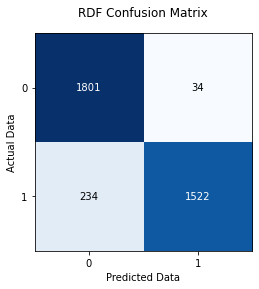

In [304]:
RDF_ConMat = CT(TestB, RDFPred)
f5, Axis5 = plot_confusion_matrix(conf_mat=RDF_ConMat ,  figsize=(8, 4))
pt.title("RDF Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

RDF Classifier Area Under Curve is : 0.9241069932283552


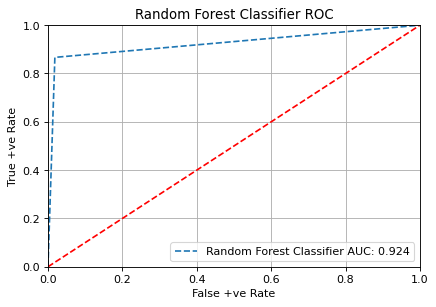

In [305]:
fpr5, tpr5, thresholds5 = m.roc_curve(TestB, RDFPred, pos_label=1)
RDF_Curve = m.auc(fpr5, tpr5)
fig5=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("RDF Classifier Area Under Curve is : {0}".format(RDF_Curve))

pt.title('Random Forest Classifier ROC')
pt.plot(fpr5, tpr5,linestyle='--', label='Random Forest Classifier AUC: %0.3f' %RDF_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('RDF ROC')
pt.grid()
pt.show()

## 7.6 Decision Tree Learning

In [306]:
DTModel = DecisionTreeClassifier()
DTModel.fit(TrainA_Tfvecto, TrainB)

DecisionTreeClassifier()

In [307]:
DTPred = DTModel.predict(TestA_Tfvecto)
accuracy6=m.accuracy_score(TestB, DTPred)*100
print(accuracy6)

91.97994987468672


In [308]:
print(ClassRep(TestB, DTPred))

pan.DataFrame(
   CT(TestB, DTPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1835
           1       0.94      0.90      0.92      1756

    accuracy                           0.92      3591
   macro avg       0.92      0.92      0.92      3591
weighted avg       0.92      0.92      0.92      3591



PredictedData      
                          Ham  Spam
ActualData Ham           1727   108
           Spam           180  1576

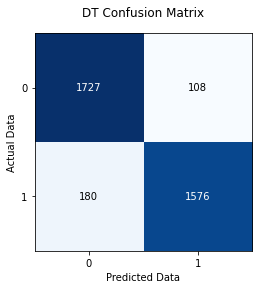

In [309]:
DT_ConMat = CT(TestB, DTPred)
f6, Axis6 = plot_confusion_matrix(conf_mat=DT_ConMat ,  figsize=(8, 4))
pt.title("DT Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

DT Classifier Area Under Curve is : 0.9193193597040586


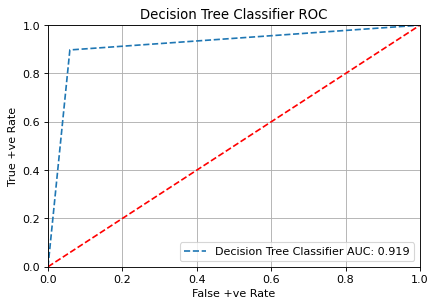

In [310]:
fpr6, tpr6, thresholds6 = m.roc_curve(TestB, DTPred, pos_label=1)
DT_Curve = m.auc(fpr6, tpr6)
fig6=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("DT Classifier Area Under Curve is : {0}".format(DT_Curve))

pt.title('Decision Tree Classifier ROC')
pt.plot(fpr6, tpr6,linestyle='--', label='Decision Tree Classifier AUC: %0.3f' %DT_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('DT ROC')
pt.grid()
pt.show()

## 7.7 Support Vector Machine Linear

In [311]:
SVMModel = SVC(kernel = 'linear')
SVMModel.fit(TrainA_Tfvecto, TrainB)

SVC(kernel='linear')

In [312]:
SVMPred = SVMModel.predict(TestA_Tfvecto)
accuracy7=m.accuracy_score(TestB, SVMPred)*100
print(accuracy7)

92.81537176274018


In [313]:
print(ClassRep(TestB, SVMPred))

pan.DataFrame(
   CT(TestB, SVMPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1835
           1       0.97      0.88      0.92      1756

    accuracy                           0.93      3591
   macro avg       0.93      0.93      0.93      3591
weighted avg       0.93      0.93      0.93      3591



PredictedData      
                          Ham  Spam
ActualData Ham           1784    51
           Spam           207  1549

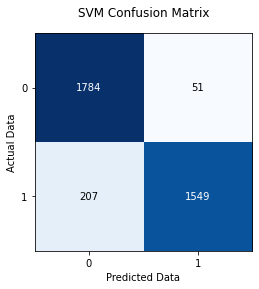

In [314]:
SVM_ConMat = CT(TestB, SVMPred)
f7, Axis7 = plot_confusion_matrix(conf_mat=SVM_ConMat ,  figsize=(8, 4))
pt.title("SVM Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

SVM Classifier Area Under Curve is : 0.9271627677468609


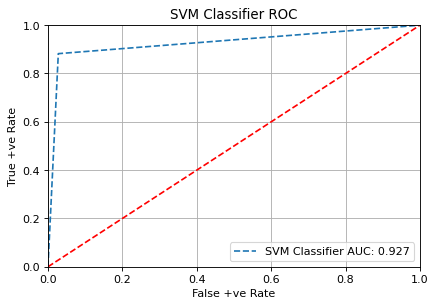

In [315]:
fpr7, tpr7, thresholds7 = m.roc_curve(TestB, SVMPred, pos_label=1)
SVM_Curve = m.auc(fpr7, tpr7)
fig7=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("SVM Classifier Area Under Curve is : {0}".format(SVM_Curve))

pt.title('SVM Classifier ROC')
pt.plot(fpr7, tpr7,linestyle='--', label='SVM Classifier AUC: %0.3f' %SVM_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('SVM ROC')
pt.grid()
pt.show()

# 8.Evaluating the Performance of the Models

## 8.1 Performance by Accuracy

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

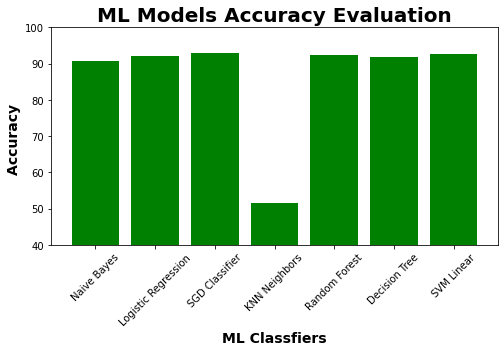

In [317]:
#Displaying the Accuracies of ML Models in bar graph
bar_width = 0.3
pt.figure(figsize=(8,4))

pt.ylim((40,100))
MLClass_acc=["Naive Bayes","Logistic Regression","SGD Classifier", "KNN Neighbors", "Random Forest", "Decision Tree","SVM Linear"]
data_acc=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]
pt.bar(x=MLClass_acc,height=data_acc,align='center', color='green')
pt.xlabel('ML Classfiers',fontsize=14,fontweight='bold')
pt.ylabel('Accuracy ',fontsize=14,fontweight='bold')
pt.title(' ML Models Accuracy Evaluation ',fontsize=20,fontweight='bold')
pt.xticks(rotation=45)

## 8.2 Performance by ROC-AUC

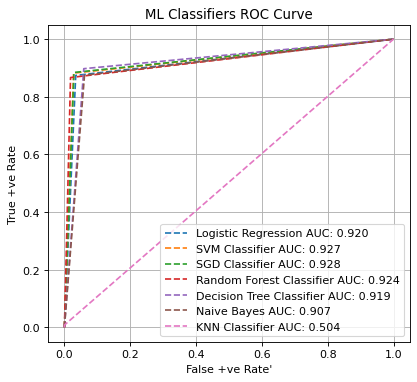

In [318]:
#Comparing all the ML Models in terms of ROC-AUC
figFinal=pt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
pt.subplot(2,2,1)

pt.plot(fpr2, tpr2,linestyle='--', label='Logistic Regression AUC: %0.3f' %LR_Curve)
pt.plot(fpr7, tpr7,linestyle='--', label='SVM Classifier AUC: %0.3f' %SVM_Curve)
pt.plot(fpr3, tpr3,linestyle='--', label='SGD Classifier AUC: %0.3f' %SGD_Curve)
pt.plot(fpr5, tpr5,linestyle='--', label='Random Forest Classifier AUC: %0.3f' %RDF_Curve)
pt.plot(fpr6, tpr6,linestyle='--', label='Decision Tree Classifier AUC: %0.3f' %DT_Curve)
pt.plot(fpr1, tpr1,linestyle='--', label='Naive Bayes AUC: %0.3f' %NB_Curve)
pt.plot(fpr4, tpr4,linestyle='--', label='KNN Classifier AUC: %0.3f' %KNN_Curve)

pt.title("ML Classifiers ROC Curve")
pt.xlabel("False +ve Rate'")
pt.ylabel("True +ve Rate")
pt.legend(loc='lower right')
pt.grid()
pt.savefig('ALL ROC')
pt.tight_layout()